In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from Recipe import *
import os
import cv2
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json
import pickle
import ast
import keras
from keras import layers
import tensorflow as tf


Using TensorFlow backend.


In [3]:
global filename
global classifier
recipe_list = []
global dataset

In [4]:
dataset = pd.read_csv('Dataset/core-data_recipe.csv',nrows=1000)

In [6]:
for i in range(len(dataset)):
    r_id = dataset._get_value(i, 'recipe_id')
    r_name = dataset._get_value(i, 'recipe_name')
    ingredients = dataset._get_value(i, 'ingredients')
    nutritions = dataset._get_value(i, 'nutritions')
    cooking = ast.literal_eval(dataset._get_value(i, 'cooking_directions')).get('directions')
    r_name = r_name.strip().lower()
    obj = Recipe()
    obj.setRecipeID(r_id)
    obj.setName(r_name)
    obj.setIngredients(ingredients)
    obj.setNutritions(nutritions)
    obj.setCooking(cooking)
    recipe_list.append(obj)
indian = np.load('index.txt.npy',allow_pickle=True)
for i in range(len(indian)):
    recipe_list.append(indian[i])
obj = recipe_list[len(recipe_list)-1]
print(obj.getName())

indian chai hot chocolate


In [7]:
encoding_dim = 32
X_train = np.load('model/X.txt.npy')
Y_train = np.load('model/Y.txt.npy')
X = X_train.reshape(X_train.shape[0],(64 * 64 * 3))

In [8]:
print(X.shape)

(5625, 12288)


# Autoencoder CNN

In [14]:
input_img = keras.Input(shape=(X.shape[1],))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(Y_train.shape[1], activation='softmax')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
hist = autoencoder.fit(X, Y_train, batch_size=8, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
704/704 - 1s - loss: 0.0071
Epoch 2/10
704/704 - 1s - loss: 0.0071
Epoch 3/10
704/704 - 1s - loss: 0.0071
Epoch 4/10
704/704 - 1s - loss: 0.0071
Epoch 5/10
704/704 - 1s - loss: 0.0071
Epoch 6/10
704/704 - 1s - loss: 0.0071
Epoch 7/10
704/704 - 1s - loss: 0.0071
Epoch 8/10
704/704 - 1s - loss: 0.0071
Epoch 9/10
704/704 - 1s - loss: 0.0071
Epoch 10/10
704/704 - 1s - loss: 0.0071


In [85]:
val1 = 1 - hist.history['loss'][9]

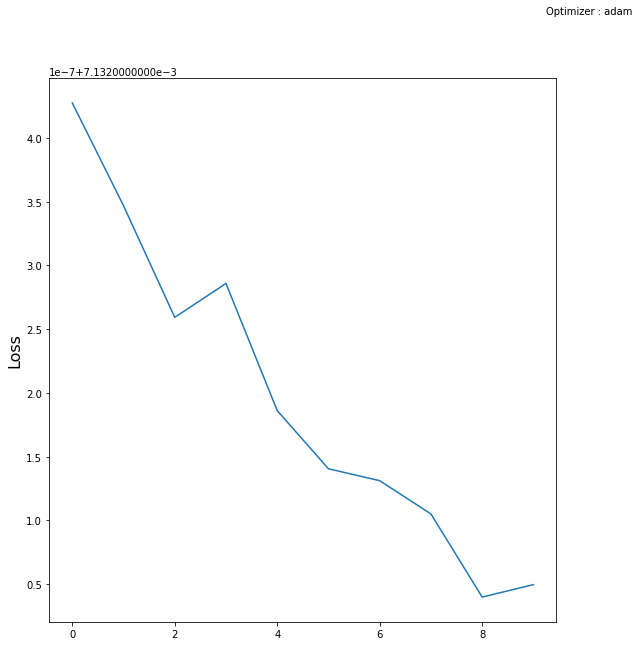

In [18]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.show()

# miniVGG

In [36]:
import os
import cv2
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json
import pickle

import keras
from keras import layers


In [37]:
X_train = np.load('model/X.txt.npy')
Y_train = np.load('model/Y.txt.npy')
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = Y_train.shape[1], activation = 'softmax'))
print(classifier.summary())
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_9 (Dense)              (None, 1126)             

In [43]:
hist1 = classifier.fit(X_train, Y_train, batch_size=16, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
352/352 - 1s - loss: 6.9964 - accuracy: 0.0000e+00
Epoch 2/10
352/352 - 1s - loss: 4.7054 - accuracy: 0.1552
Epoch 3/10
352/352 - 1s - loss: 0.9580 - accuracy: 0.7604
Epoch 4/10
352/352 - 1s - loss: 0.2480 - accuracy: 0.9394
Epoch 5/10
352/352 - 1s - loss: 0.1017 - accuracy: 0.9787
Epoch 6/10
352/352 - 1s - loss: 0.0613 - accuracy: 0.9876
Epoch 7/10
352/352 - 1s - 

In [95]:
val2 = hist1.history['accuracy'][9]

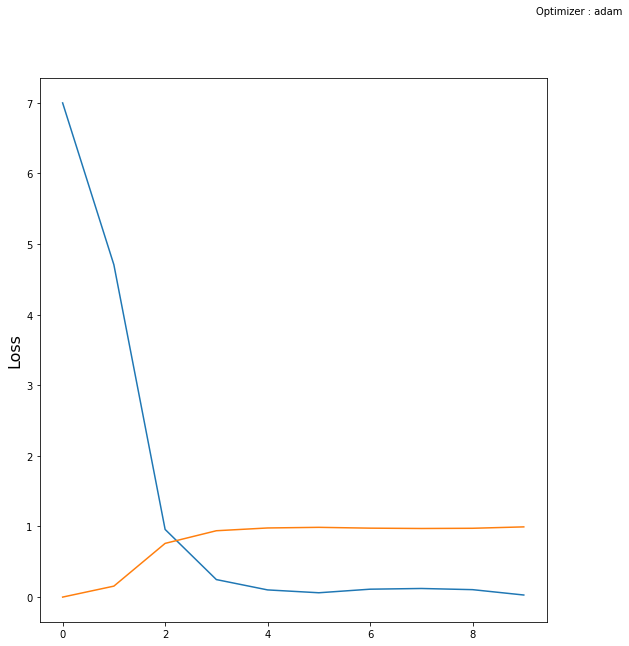

In [45]:
import matplotlib.pyplot as plt

x=hist1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.show()

# miniGoogleNet

In [56]:
def inceptionblock():
    
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Convolution2D(32, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dense(units = Y_train.shape[1], activation = 'softmax'))
    
    return model


In [59]:
model = inceptionblock()
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_13 (Dense)             (None, 1126)            

In [60]:
hist2 = model.fit(X_train, Y_train, batch_size=16, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
352/352 - 1s - loss: 0.0071 - accuracy: 0.0011
Epoch 2/10
352/352 - 1s - loss: 0.0068 - accuracy: 0.0060
Epoch 3/10
352/352 - 1s - loss: 0.0034 - accuracy: 0.3406
Epoch 4/10
352/352 - 1s - loss: 8.3511e-04 - accuracy: 0.8418
Epoch 5/10
352/352 - 1s - loss: 2.2700e-04 - accuracy: 0.9634
Epoch 6/10
352/352 - 1s - loss: 1.1135e-04 - accuracy: 0.9845
Epoch 7/10
352/352

In [94]:
val3 = hist2.history['accuracy'][9]

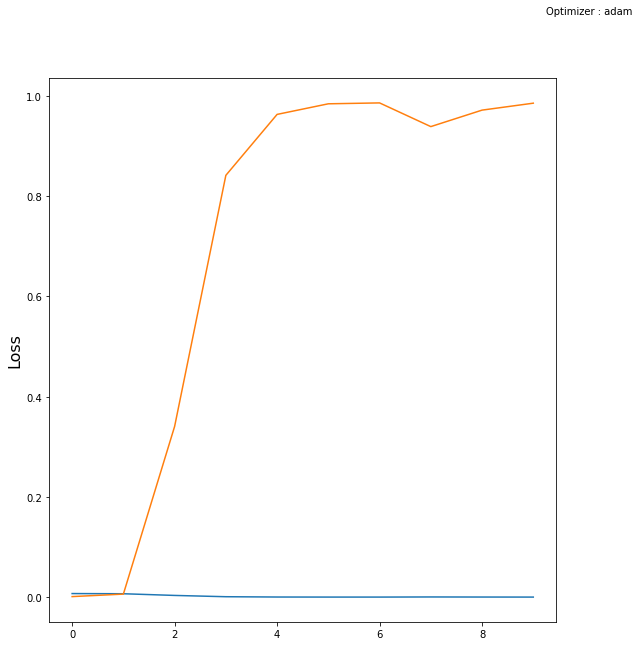

In [62]:
import matplotlib.pyplot as plt

x=hist2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.show()

# miniAlexNet

In [66]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = Y_train.shape[1], activation = 'softmax'))


In [67]:
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 1, 16)          4624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16)              

In [69]:
hist3 = model.fit(X_train, Y_train, batch_size=16, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
352/352 - 1s - loss: 0.0052 - accuracy: 0.0270
Epoch 2/100
352/352 - 1s - loss: 0.0051 - accuracy: 0.0382
Epoch 3/100
352/352 - 1s - loss: 0.0049 - accuracy: 0.0503
Epoch 4/100
352/352 - 1s - loss: 0.0048 - accuracy: 0.0649
Epoch 5/100
352/352 - 1s - loss: 0.0047 - accuracy: 0.0921
Epoch 6/100
352/352 - 1s - loss: 0.0046 - accuracy: 0.0985
Epoch 7/100
352/352 - 1s - loss: 0.0045 - accuracy: 0.1182
Epoch 8/100
352/352 - 1s - loss: 0.0043 - accuracy: 0.1426
Epoch 9/100
352/352 - 1s - loss: 0.0042 - accuracy: 0.1636
Epoch 10/100
352/352 - 1s - loss: 0.0041 - accuracy: 0.1721
Epoch 11/100
352/352 - 1s - loss: 0.0040 - accuracy: 0.2055
Epoch 12/100
352/352 - 1s - loss: 0.0039 - accuracy: 0.2265
Epoch 13/100
352/352 - 1s - loss: 0.0038 - accuracy: 0.2427
Epoch 14/100
352/352 - 1s - loss: 0.0037 - accuracy: 0.2587
Epoch 15/100
352/352 - 1s - loss: 0.0037 - accuracy: 0.2674
Epoch 16/100
352/352 - 1s - loss: 0.0035 - accuracy: 0.2964
Epoch 17/100
352/352 - 1s - loss: 0.0035 - accura

In [93]:
val4 = hist3.history['accuracy'][99]

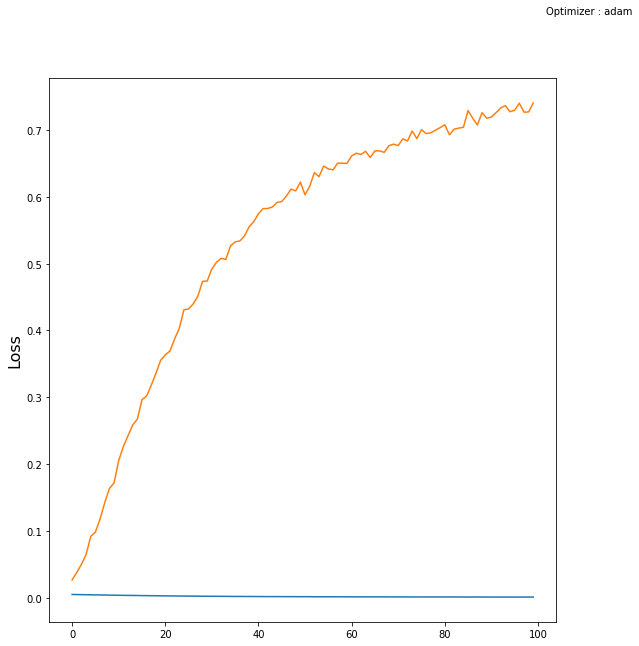

In [70]:
import matplotlib.pyplot as plt

x=hist3
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.show()

# CNN with 2 FullyConnected Layer 

In [77]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(filters = 4, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = Y_train.shape[1], activation = 'softmax'))


In [80]:
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 1, 1, 16)          4624      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 1, 16)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 1, 1, 16)        

In [82]:
hist4 = model.fit(X_train, Y_train, batch_size=16, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
352/352 - 1s - loss: 0.0071
Epoch 2/10
352/352 - 1s - loss: 0.0071
Epoch 3/10
352/352 - 1s - loss: 0.0071
Epoch 4/10
352/352 - 1s - loss: 0.0071
Epoch 5/10
352/352 - 1s - loss: 0.0071
Epoch 6/10
352/352 - 1s - loss: 0.0071
Epoch 7/10
352/352 - 1s - loss: 0.0071
Epoch 8/10
352/352 - 1s - loss: 0.0071
Epoch 9/10
352/352 - 1s - loss: 0.0071
Epoch 10/10
352/352 - 1s - loss: 0.0071


In [89]:
val5 = 1 - hist4.history['loss'][9]

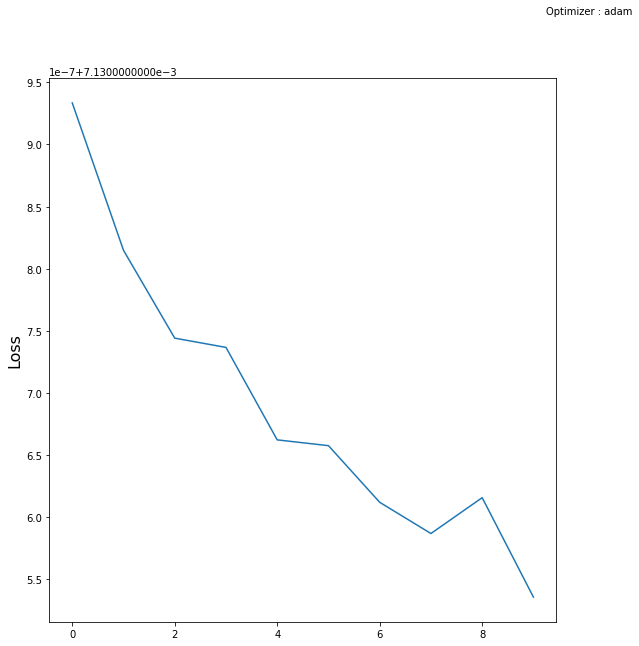

In [83]:
import matplotlib.pyplot as plt

x=hist4
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.show()

# Comparison

In [96]:
score = [val1,val2,val3,val4,val5]

In [97]:
#make variabel for save the result and to show it
classifier = ('Autoencoder CNN','miniVGG','miniGoogleNet','miniAlexNet','CNN + 2 FullyConnected')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[0.9928679503500462, 0.9939555525779724, 0.9857777953147888, 0.7402666807174683, 0.9928694646805525]


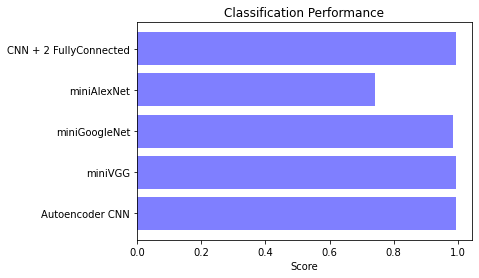

In [98]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [1]:
import numpy as np
import pandas as pd
from Recipe import *
import os
import cv2

In [7]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json

In [17]:
import ast

In [18]:
recipe_list = []

In [20]:
recipe_list.clear()
dataset = pd.read_csv('Dataset/core-data_recipe.csv',nrows=1000)
for i in range(len(dataset)):
    r_id = dataset._get_value(i, 'recipe_id')
    r_name = dataset._get_value(i, 'recipe_name')
    ingredients = dataset._get_value(i, 'ingredients')
    nutritions = dataset._get_value(i, 'nutritions')
    cooking = ast.literal_eval(dataset._get_value(i, 'cooking_directions')).get('directions')
    r_name = r_name.strip().lower()
    obj = Recipe()
    obj.setRecipeID(r_id)
    obj.setName(r_name)
    obj.setIngredients(ingredients)
    obj.setNutritions(nutritions)
    obj.setCooking(cooking)
    recipe_list.append(obj)
indian = np.load('index.txt.npy',allow_pickle=True)
for i in range(len(indian)):
    recipe_list.append(indian[i])
obj = recipe_list[len(recipe_list)-1]
print(obj.getName())

indian chai hot chocolate


In [9]:
global classifier
if os.path.exists('model/1model.json'):
    with open('model/1model.json', "r") as json_file:
        loaded_model_json = json_file.read()
        classifier = model_from_json(loaded_model_json)
    classifier.load_weights("model/1model_weights.h5")
    #classifier._make_predict_function()  
    print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_2 (Dense)              (None, 1126)             

In [10]:
image = cv2.imread('testImages/1.jpg')

In [11]:
img = cv2.resize(image, (64,64))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,64,64,3)
img = np.asarray(im2arr)
img = img.astype('float32')
img = img/255
preds = classifier.predict(img)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [12]:
predict = np.argmax(preds)
if predict > 0:
    predict = predict - 1
print(predict)

1122


In [21]:
obj = recipe_list[predict]

In [22]:
obj.getName()

'indian vegetable rice'

In [23]:
obj.getIngredients()

'vegetable oil^onion^ground cumin^Basmati rice^water^salt^garam masala^frozen mixed vegetables'

In [24]:
obj.getCooking()

'Prep\n10 m\nCook\n40 m\nReady In\n50 m\nIn a large pan heat oil over medium heat and saute onions and cumin until onions are tender, but not browned. Rinse the rise several times and drain well. Add the rice to the pan with the onions and pour in the 2 cups of water. Stir in salt, garam masala and vegetables. Cover the pan and increase the heat to high.\nBring the mixture to a boil and then reduce the heat to low, keeping the rice covered at all times. After cooking for about 10 minutes, gently stir the rice to distribute the spices evenly. Cook 25 to 30 minutes, or until all of the water has evaporated and the rice is tender.'

In [25]:
obj.getNutritions()

"{u'niacin': {u'hasCompleteData': False, u'name': u'Niacin Equivalents', u'amount': 1.377288, u'percentDailyValue': u'11', u'displayValue': u'1', u'unit': u'mg'}, u'sugars': {u'hasCompleteData': False, u'name': u'Sugars', u'amount': 3.643998, u'percentDailyValue': u'0', u'displayValue': u'3.6', u'unit': u'g'}, u'sodium': {u'hasCompleteData': False, u'name': u'Sodium', u'amount': 904.5907, u'percentDailyValue': u'36', u'displayValue': u'905', u'unit': u'mg'}, u'carbohydrates': {u'hasCompleteData': False, u'name': u'Carbohydrates', u'amount': 87.06129, u'percentDailyValue': u'28', u'displayValue': u'87.1', u'unit': u'g'}, u'vitaminB6': {u'hasCompleteData': False, u'name': u'Vitamin B6', u'amount': 0.1287863, u'percentDailyValue': u'8', u'displayValue': u'< 1', u'unit': u'mg'}, u'calories': {u'hasCompleteData': False, u'name': u'Calories', u'amount': 514.7228, u'percentDailyValue': u'26', u'displayValue': u'515', u'unit': u'kcal'}, u'thiamin': {u'hasCompleteData': False, u'name': u'Thiami